청와대 국민청원 데이터를 크롤링한후 , 분석하는 과정입니다.
==
20152049 정보통신 공학과 서민석 입니다.

감정분석은 머신러닝 이랑 조교선생님 께서 알려주신 방법으로 두가지로 해 보았고
나머지는 데이터 시각화 입니다.

In [154]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from plotnine import *
from konlpy.tag import Twitter, Kkma, Mecab, Hannanum
import warnings
from collections import Counter
import re
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer

%matplotlib inline

warnings.filterwarnings('ignore')

In [363]:
# 숫자 말고 다른거 다지우기
def find_int(count):
    i = (re.findall(r'\d+', count))
    ints = int(''.join(map(str, i)))
    return ints

# 워드 클라우드 만들기
def displayWordCloud(data = None, backgroundcolor = 'white', width=600, height=600 ):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# 감정 분석하기
def mysan(mystr,neg_list,pos_list):
    print(mystr)
    mystr = twitter.nouns(mystr) # 내용입니다.
    pos_score = 0
    neg_score = 0
    for i in mystr:
        for j in pos_list:
            if i == j :
                pos_score += 1
        for j in neg_list:
            if i == j:
                neg_score +=1
    return pos_score, neg_score

# 긍정 스코어 부정 스코어 계산하기.
def mincal(pos_score, neg_score):
    a = pos_score - neg_score
#    print(pos_score,"---",neg_score)
    if a< -10:
        return print("\n많은 투표를 받지 못할 것 같습니다.")
    elif -10<a  and a <3   :
        return print("\n운만 좋다면 100 표이상 받을 것 같습니다.")
    else:
        return print("\n매우 많은 표를 받을 수 있습니다.")

In [233]:
path ='/home/minseok/mypro/dae.csv' # 경로 입니다.
dae = pd.read_csv(path, index_col=0, parse_dates=['start', 'end']) #csv 파일을 엽니다.

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
26,2017-08-19,2017-08-26,0,2,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...
27,2017-08-19,2017-09-18,0,1,정치개혁,김이수 헌재소장 임명 재고 건의,문 대통령님께 묻습니다 (2017. 8. 19)\n저는 경기도 용인에 살고 있는 국...
28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
29,2017-08-19,2017-09-18,0,3,미래,문재인 정부는 왜 공무원개혁엔 무관심한가?,살충제 계란 사건으로 국민들을 불안케 하고 있다.\n원인이 무엇인가? 살충제를 뿌린...


# category 별로 어느 청원이 많이 들어왔는데 정렬하고 DataFrame 으로 보여줍니다.


In [4]:
ca = pd.DataFrame(dae['category'].value_counts()).reset_index()
ca.columns = ['category', 'counts']
ca

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


# pivot_table로 투표 받은 높은순으로 정렬하고 보여줍니다.

청원은 정치개혁이 가장 많았으나, 많은 사람들의 공감을 얻어 투표를 가장 많이 받은 분야는 인권/성평등 이었습니다.

In [5]:
dae_unique = pd.pivot_table(dae, index=['category'], aggfunc=np.sum)
dae_best = dae_unique.sort_values(by='votes', ascending=False).reset_index()
dae_best

,category,answered,votes
0,인권/성평등,9,12559348
1,안전/환경,2,6605175
2,정치개혁,2,6205013
3,기타,1,5190468
4,육아/교육,1,4475297
5,보건복지,2,4341211
6,문화/예술/체육/언론,4,4149796
7,외교/통일/국방,1,3696112
8,교통/건축/국토,2,2902330
9,반려동물,0,2066624


시각화 합니다. 텍스트 마이닝 수업을 듣기 때문에 ggplot2가 편해서 그렇게 헀습니다.
=======================
## 당연한 것 일지도 모르지만 저출산/고령화대책 은 어른들이 많이 걱정하시는데 인터넷은 젊은 사람들이 더 많이 하므로 투표율이 낮았고 농산어촌 또한 , 농어촌에 종사하는 사람들의 숫자가 적고 종사 하더라도 인터넷을 잘 하지 않는 사람들 이기때문에  글 수도 적고 투표수도 적었습니다. 
# 또한 인권 성평등은 요즘 인권 성평등에 관한 미디어의 관심이 쏟아지고 있고 젊은 사람들 사이에서 유행처럼 번지고 있기때문에 관심이 없어도 비교적 많은 사람들이 투표를 하는 것 같습니다

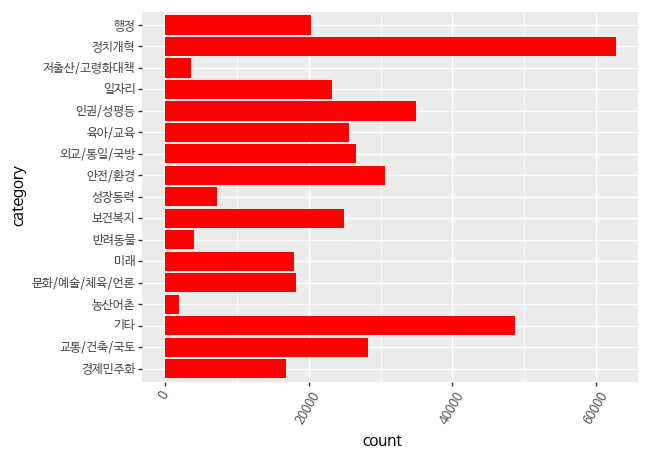

<ggplot: (-9223363303263684597)>

In [6]:
# 카테고리별  청원 수 입니다.
(ggplot(dae)
 + aes('category')
 + geom_bar(fill='red')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

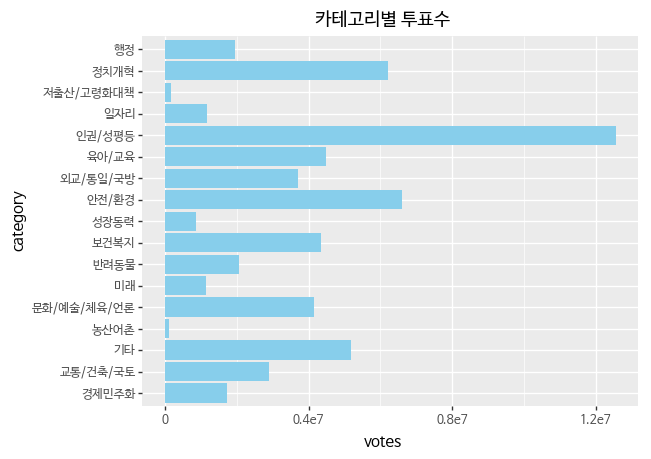

<ggplot: (8733586666900)>

In [7]:
#카테고리별 투표 수 입니다.

(ggplot(dae)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [55]:
twitter = Twitter()

In [56]:
petitions_content_bb = twitter.nouns(str(dae['content'])) # 내용입니다.
petitions_content_aa = twitter.nouns(str(dae['title'])) # 제목 입니다.

워드 클라우드 만들기 입니다. 위는 제목, 아래는 내용의 워드 클라우드이며 , 공통적으로 많이 들어가는 내용은 정치에 관한 내용입니다.
=============

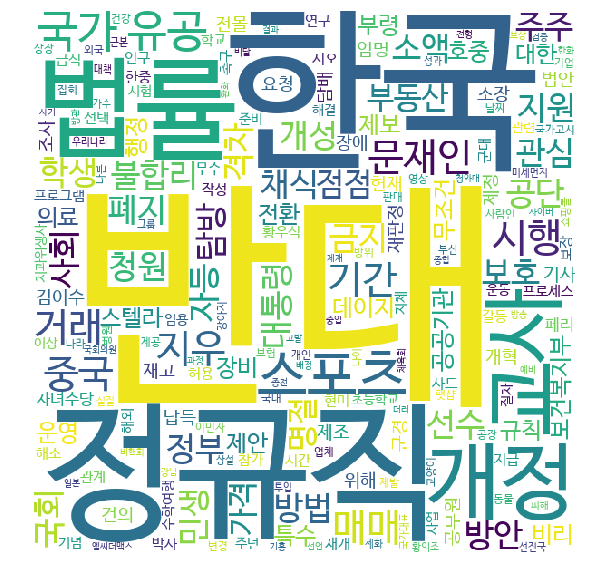

In [97]:
# 제목을 워드 클라우드로 만들었습니다.

displayWordCloud(' '.join(petitions_content_aa))

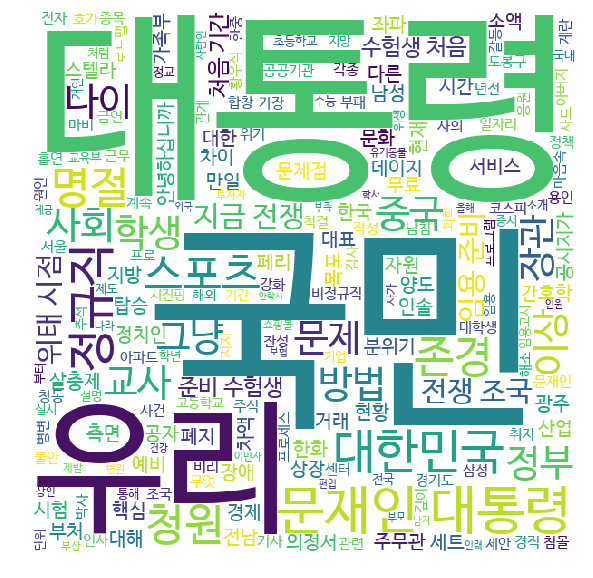

In [98]:
# 내요을 워드 클라우드로 만들었습니다.

displayWordCloud(' '.join(petitions_content_bb))

RandomForestClassifier 을 활용하여 "기타" 항목 이었던 청원에 태그를 달아줍니다.
===========

# 감성분석 이라는 주제를 주셨는데 , 저는 감성분석이라는 것이 문장이 긍정인지 부정인지,
# 크게 보면 문장이 어느 곳에 속하는지 라고 생각하였습니다.
# 그래서 문장을 보고 그 문장이 어느 카테고리에 맞을지 맞추는것도 감성분석이라고 생각하여서 카테고리를 맞추는 것을 했습니다. 


In [99]:
petitions = pd.read_csv(path, parse_dates=['start', 'end'])

In [100]:
df = petitions.loc[(petitions['votes'] > 1000)].copy()

In [101]:
category_count = df['category'].value_counts()

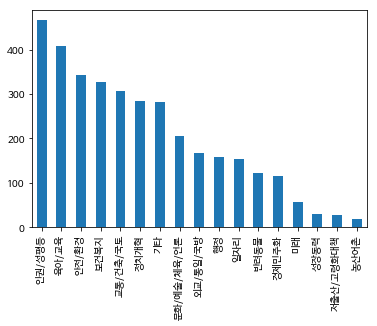

In [102]:
plt.rcParams["font.family"] = 'NanumBarunGothic'
category_count.plot(kind='bar')

In [103]:
df['category_pred'] = df['category'].copy()

In [155]:
# 개행문자 제거, 특수문자 제거입니다.
def preprocessing(text):

    text= str(text)
    text = re.sub('\\\\n', ' ', text)
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [156]:
# 불용어를 제거 합니다.
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['수', '그', '있는', '있습니다','년도', '합니다', '하는', '및', '제', '할', '하고', '더', '대한', '한', '그리고', '월', '저는', '없는', '입니다', '등', '일', '많은', '이런', '것은', '왜','같은', '같습니다', '없습니다', '위해', '한다']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [157]:
df['content_preprocessing'] = df['content'].apply(preprocessing)

In [158]:
df['content_preprocessing2'] = df['content_preprocessing'].apply(remove_stopwords)

In [159]:
df['category_pred'] = df['category'].copy()

In [114]:
df_not_etc = df.loc[df['category'] != '기타'].copy()
df_etc = df.loc[df['category'] == '기타'].copy()
print(df_not_etc.shape)
print(df_etc.shape)

(3191, 11)
(281, 11)


In [116]:
stops = ['and', 'article', 'html', '수', '현', '있는', '있습니다', '그', '년도', '합니다', '하는', '및', '제', '할', '하고', '더', '대한', '한', '그리고', '월', '저는', '없는', '입니다', '등', '일', '많은', '이런', '것은', '왜','같은', '같습니다', '없습니다', '위해', '한다']
vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = stops, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋다. 
                             ngram_range=(1, 9), # BOW의 단위를 1~3개로 지정합니다.
                             max_features = 2000 # 만들 피처의 수, 단어의 수가 된다.
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=2000, min_df=2,
        ngram_range=(1, 9), preprocessor=None,
        stop_words=['and', 'article', 'html', '수', '현', '있는', '있습니다', '그', '년도', '합니다', '하는', '및', '제', '할', '하고', '더', '대한', '한', '그리고', '월', '저는', '없는', '입니다', '등', '일', '많은', '이런', '것은', '왜', '같은', '같습니다', '없습니다', '위해', '한다'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [117]:
df_not_etc_vector = vectorizer.fit_transform(df_not_etc['content_preprocessing2'])
df_not_etc_vector.shape

(3191, 2000)

In [118]:
df_etc_vector = vectorizer.fit_transform(df_etc['content_preprocessing2'])
df_etc_vector.shape

(281, 2000)

In [119]:
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [120]:
df_not_etc_tfidf = transformer.fit_transform(df_not_etc_vector)
df_not_etc_tfidf.shape

(3191, 2000)

In [121]:
df_etc_tfidf = transformer.fit_transform(df_etc_vector)
df_etc_tfidf.shape

(281, 2000)

In [122]:
#  랜덤 포레스트로 학습시킵니다.

forest = RandomForestClassifier( n_estimators = 100, n_jobs = -1, random_state=2018)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [151]:
y_label = df_not_etc['category']
forest = forest.fit(df_not_etc_tfidf, y_label)

In [152]:
df_etc['category_pred'] = y_pred
df_etc['category_pred'].value_counts()

인권/성평등         73
육아/교육          66
교통/건축/국토       33
보건복지           28
정치개혁           25
반려동물           18
안전/환경          14
경제민주화          11
문화/예술/체육/언론     6
외교/통일/국방        4
일자리             3
Name: category_pred, dtype: int64

# 전부는 아니지만 대부분은 제대로 분류된 것 처럼 보입니다.

In [160]:
# 예측한 결과를 10개만 봅니다. 제대로 예측했나 , 대체적으로 제대로 예측하지는 못한것 같습니다.

df_etc[['votes', 'title', 'content', 'category', 'category_pred']].head(10)

,votes,title,content,category,category_pred
345,1126,문재인 대통령 기념 시계도 판매하라.,문재인 대통령 싸인이 들어간 기념 시계를 판매용으로 전환하여 주세요. SNS상의 국...,기타,반려동물
487,2749,2017년 10월 원천세 신고기한 및 9월분 전자세금계산서 발행기한일을 10월 13...,2017년 추석연휴 및 10월 2일 임시공휴일 지정이 확정됨에 따라 10월 초에 법...,기타,교통/건축/국토
12747,1841,억울한죽음으로 돌아가신 고 이길연집배원의 순직을요구합니다,9월5일 서광주우체국에 근속중이신 고 이길연집배원 저희아버지가 자택에서 홀로목숨을끈...,기타,육아/교육
15456,1705,화훼도매시장 출입에 대한 출입증 발급을 청원합니다,화훼쪽에 종사하고 있는 사람입니다\n김영란법이 터지고 나서 뉴스를 보면 양재화훼시장...,기타,육아/교육
17150,1078,TNS홀딩스 강태욱 대표 사기 횡령 사건 해결을 부탁드립니다.,안녕하세요\n영등포구에 거주하는 30살 직장인입니다.\n2014년부터 알고지낸 재무...,기타,육아/교육
19072,123530,'일간베스트'사이트를 폐지해주세요,"국민들을 불편하게하고, 주변에 민폐를 끼치기로 유명한 일베는 사회적이슈로도 자주 떠...",기타,교통/건축/국토
22162,2452,경찰들의 성교육 이수 및 가중처벌,최근 경찰의 성폭행 성추행 성희롱등 그 주체가 범죄를 다루고 있는 경찰이된 사건들이...,기타,인권/성평등
22375,2684,튜닝카 법 개정,차량튜닝에대한 법 개정이 필요할것같습니다. 요즘 튜닝사업이 확대되는 시대 입니다. ...,기타,안전/환경
22551,2278,을지대학교병원지부 노동조합 파업사태 해결 촉구,"문재인 대통령께\n안녕하세요 대통령님, 저는 대전 을지대학교병원에 근무하는 병원노동...",기타,인권/성평등
23292,1470,우리나라 법은 도대체 누구를 위한 법입니까 법 개선과 피해자를 위한 제도마련이 필요...,안녕하세요 .\n오늘도 국민들을 위해 나라에 힘써주시느라 너무나 고생이 많으십니다....,기타,인권/성평등


## 이것은 청와대 국민청원 답변이 이루어진 것들을 크롤링해서 워드 클라우드로 정리한 것 입니다.
## 보시는 것과 같이 인권에 대한 청원이 가장 많은 국민들의 공감대를 형성 하였고 답변 또한 인권에 대한 내용이 많으며 , 구체적인 해결책을 답변하는 것 이기때문에 소통 센터 보건복지부 비서 같은 구체적인 단어가 많이 나오는 것이 보입니다.

In [232]:
df = pd.read_csv("briefing.csv")
df

,num,category,start-days,end-days,person,progress,title,count,petition_overview,petition_answer
0,1785,인권/성평등,2017-09-03,2017-11-02,naver - ***,브리핑,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,296330,\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t안녕하십니까. 청소년보호법이란...,\n\n윤영찬 수석 : 안녕하세요. 친절한 청와대 진행을 맡은 윤영찬 국민소통수석입...
1,10949,미래,2017-09-06,2017-12-05,facebook - ***,브리핑,조두순 출소반대,615354,\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t제발 조두순 재심다시해서 무기...,\n\n▲고민정 부대변인 : 안녕하세요. '11시 50분 청와대입니다.' 저는 청와...
2,18278,인권/성평등,2017-09-30,2017-10-30,naver - ***,브리핑,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,235372,\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t안녕하세요. 존경하는 대통령님...,"\n\n- 낙태죄 폐지 청원은 “원치 않는 출산은 여성은 물론 태어나는 아이, 국가..."
3,26024,안전/환경,2017-11-04,2017-12-04,facebook - ***,브리핑,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,216774,"\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t'주취감형'이란, 술을 먹고 ...",\n\n▲고민정 부대변인 : 안녕하세요. '11시 50분 청와대입니다.' 저는 청와...
4,45581,보건복지,2017-11-17,2017-12-17,kakao - ***,브리핑,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원",281985,\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t청원사항) \n\t\t\t\...,\n\n▲박능후 보건복지부 장관 : 이번 청원에 답을 하기 위해서 현장을 많이 방문...
5,49083,기타,2017-11-24,2017-12-24,naver - ***,브리핑,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!",211064,"\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t3년 이하의 징역, 또는3천만...",\n\n안녕하세요. 산업정책비서관 채희봉입니다. 전기·생활용품안전관리법을 개정 또는...
6,57132,성장동력,2017-12-03,2018-01-02,naver - ***,브리핑,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),255554,\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t2017년 1월 28일부터 시...,\n\n안녕하세요. 산업정책비서관 채희봉입니다. 전기·생활용품안전관리법을 개정 또는...
7,76020,성장동력,2017-12-28,2018-01-27,kakao - ***,브리핑,<가상화폐규제반대> 정부는 국민들에게 단 한번이라도 행복한 꿈을 꾸게 해본적 있습니까?,228295,\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t저는 정부에게 묻고 싶습니다....,"\n\nQ. 안녕하세요. 뉴미디어비서관 정혜승입니다. 친절한 청와대, 오늘은 <가상..."
8,79162,인권/성평등,2018-01-03,2018-02-02,naver - ***,브리핑,미성년자 성폭행 형량 올려주세요 종신형원합니다,233842,\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t또 창원에서 조두순사건과 같은...,\n\nQ : 안녕하세요. 뉴미디어비서관실 김선 행정관입니다. 오늘 <11시 50분...
9,81026,인권/성평등,2018-01-06,2018-02-05,naver - ***,브리핑,초.중.고 학교 페미니즘교육 의무화,213219,\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t아직 판단이 무분별한 어린학생...,"\n\nQ : 안녕하세요. ‘11시50분 청와대입니다‘, 오늘도 국민청원에 대한 답..."


In [229]:
df_ti = twitter.nouns(str(df['title'])) # 내용입니다.
df_an = twitter.nouns(str(df['petition_answer'])) # 내용입니다.

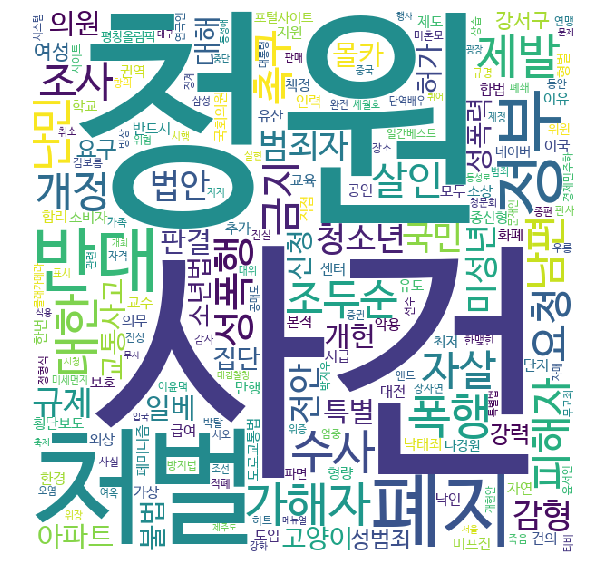

In [230]:
displayWordCloud(' '.join(df_ti))

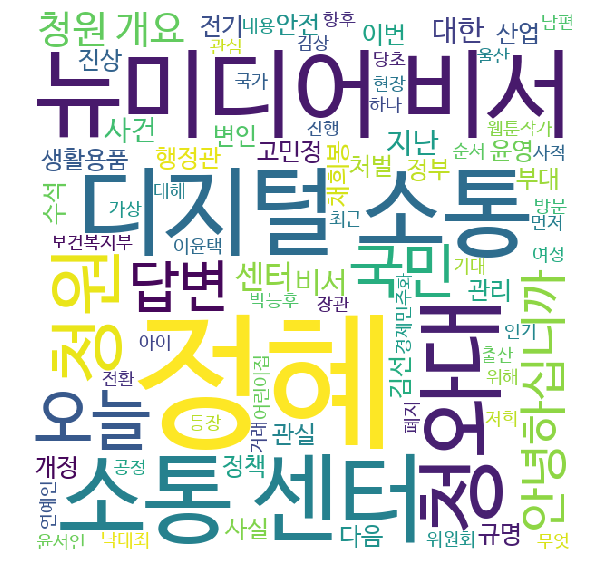

In [231]:
displayWordCloud(' '.join(df_an))

# 수업시간에 조교선생님께서 해주신 방법으로 감성분석을 해보겠습니다.
# 감성분석 주제는 감성분석을 통하여 투표를 많이 받을 수 있을 것인가 아니면 투표를 많이 받을 것인가 하는 것 입니다.


In [305]:
# 위에서 분석한 것 처럼 가장 적은 투표를 받은 농산어촌 , 저출산 고령화 대책 파트에서 부정단어를 가져올 것 입니다.
# 전체 에서 투표수가 0개인걸로 하려고 했으나 국민청원이 워낙 0표인게 많아서 별로 효과가 없을거라고 생각 했기 때문입니다.

dae_1 = dae[dae['category'] == '농산어촌']
dae_2 = dae[dae['category'] == '저출산/고령화대책']

In [253]:
title_1 = twitter.nouns(str(dae_1['title']))
title_2 = twitter.nouns(str(dae_1['title']))

In [337]:
# 부정단어 리스트 입니다.
neg_list = title_1  + title_2
#  긍정단어 리스트 입니다.
pos_list = df_ti

pos_score = 0
neg_score = 0

In [351]:
# 긍정 샘플 2개
sample_1 = "미성년자 성폭행 형량 올려주세요 종신형원합니다" # 답변 받은것
sample_2 = "초.중.고 학교 페미니즘교육 의무화" #답변 받은것

#애매한거 2개
sample_3 = "소액주주를 보호해주십시오" # 1000표임
sample_4 = "국회에서 국회선진화법 위반 및 불법을 자행한 자유한국당 의원들을 법대로 엄정 처벌해주시기 바랍니다." # 10000표임

# 완전 부정 2개
sample_5 = "농림부 장관님, 식약처장님. 이런때일수록 폭로하는 것을 두려워마십시오." # 0표
sample_6 = "작은 개척교회를 정년퇴직하시고 소작농이 되신 목사님의 사연입니다" # 0표 

우연 인지는 몰라도 내가 랜덤으로 뽑은 셈플들은 전부 잘 작동하였다. 딥러닝 , 머신러닝이 아닌 이런 룰 베이스로 코딩을해도 정확도가 높을 수 있다는 것에 놀랐고 , 좋은 경험이었다.
==========

In [364]:
b,c=mysan(sample_1, neg_list,pos_list)
mincal(b,c)
print("------------------------------------------------------------")
b,c=mysan(sample_2, neg_list,pos_list)
mincal(b,c)
print("------------------------------------------------------------")
b,c=mysan(sample_3, neg_list,pos_list)
mincal(b,c)
print("------------------------------------------------------------")
b,c=mysan(sample_4, neg_list,pos_list)
mincal(b,c)
print("------------------------------------------------------------")
b,c=mysan(sample_5, neg_list,pos_list)
mincal(b,c)
print("------------------------------------------------------------")
b,c=mysan(sample_6, neg_list,pos_list)
mincal(b,c)

미성년자 성폭행 형량 올려주세요 종신형원합니다

매우 많은 표를 받을 수 있습니다.
------------------------------------------------------------
초.중.고 학교 페미니즘교육 의무화

매우 많은 표를 받을 수 있습니다.
------------------------------------------------------------
소액주주를 보호해주십시오

운만 좋다면 100 표이상 받을 것 같습니다.
------------------------------------------------------------
국회에서 국회선진화법 위반 및 불법을 자행한 자유한국당 의원들을 법대로 엄정 처벌해주시기 바랍니다.

운만 좋다면 100 표이상 받을 것 같습니다.
------------------------------------------------------------
농림부 장관님, 식약처장님. 이런때일수록 폭로하는 것을 두려워마십시오.

많은 투표를 받지 못할 것 같습니다.
------------------------------------------------------------
작은 개척교회를 정년퇴직하시고 소작농이 되신 목사님의 사연입니다

많은 투표를 받지 못할 것 같습니다.
